# Calcul du nombre moyen de coformes pour les paradigmes
1. paradigme morphosyntaxique
1. paradigme morphomique

In [82]:
import pandas as pd
import glob,re

In [83]:
pylab inline

SyntaxError: invalid syntax (<ipython-input-83-b794e5809f34>, line 1)

### Emplacement des données

In [84]:
baseRepName="/Users/gilles/Box Sync/2015-Data/"
repName=baseRepName+"DerivationParadigmes/"

In [85]:
baseRepName="/Users/gilles/Box Sync/2015-Data/"
repName=baseRepName+"FlexionAdjectifs/"

### Assemblage d'une ligne
- moyenne, médiane, Q1, Q3

In [86]:
def arrondi(n):
   return int(round(n,0)) 

In [87]:
def getPoint(df):
    df.drop('None', axis=1, inplace=True)
    df.drop(df.index[[0,1]],inplace=True)
    s=df.apply(pd.to_numeric).stack()
    mean=arrondi(s.mean())
    median=arrondi(s.median())
    q1=arrondi(s.quantile(0.25))
    q3=arrondi(s.quantile(0.75))
    return [mean, median, q1,q3]

In [88]:
def getTokensForms(nomFichier):
    m=re.search(ur"-T(\d+)-",nomFichier)
    if m:
        nbTokens=int(m.group(1))
    else:
        print "pas de nombre de Tokens dans le nom de fichier"
        nbTokens=pd.NaT
    m=re.search(ur"-F(\d+)-",nomFichier)
    if m:
        nbForms=int(m.group(1))
    else:
        print "pas de nombre de Tokens dans le nom de fichier"
        nbForms=pd.NaT
    return [nbTokens,nbForms]

In [89]:
def getData(serie,rep=repName):
    data={}
    for numMSP,msp in enumerate(glob.glob(rep+"*%s.csv"%serie)):
        dataLine=getTokensForms(msp)
        pdMSP=pd.read_csv(filepath_or_buffer=msp,sep=";")
        dataLine.extend(getPoint(pdMSP))
        data[int((numMSP+1))]=dataLine
    return data

In [90]:
def getSerie(serie):
    serieInitial=serie[0]
    parSerie=pd.DataFrame.from_dict(getData(serie),orient="index",dtype=int).sort_index()
    parSerie.columns=["tokens","forms"+serieInitial,"mean"+serieInitial,"median"+serieInitial,"Q1"+serieInitial,"Q3"+serieInitial]
    parSerie.set_index("tokens",inplace=True)
    return parSerie

In [91]:
parOMP=getSerie("Groupe")
parMSP=getSerie("Separe")

In [92]:
parMSP

,formsS,meanS,medianS,Q1S,Q3S
tokens,,,,,
10000,2994,381,264,228,450
20000,4568,642,493,428,742
30000,5701,839,665,588,971
40000,6652,1019,835,742,1189
50000,7385,1166,988,875,1342
60000,8040,1302,1123,1001,1496
70000,8568,1412,1233,1098,1619
80000,9081,1521,1340,1197,1749
90000,9561,1620,1433,1294,1852


In [93]:
parCOMP=parMSP.join(parOMP)
parCOMP.drop("formsG",axis=1,inplace=True)
parCOMP.columns=["Forms","mean MSP","median MSP","Q1 MSP","Q3 MSP","mean OMP","median OMP","Q1 OMP","Q3 OMP"]

(<matplotlib.axes._subplots.AxesSubplot at 0x11737ea50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1180e2fd0>)

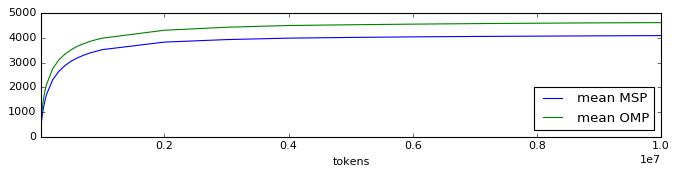

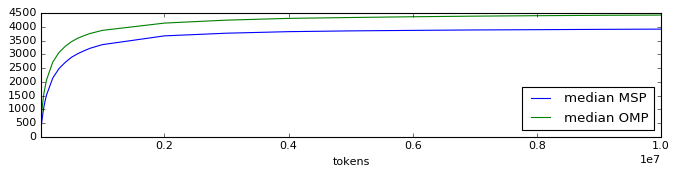

In [94]:
parCOMP[0:28][["mean MSP","mean OMP"]].plot(figsize=(10,2),logx=False),parCOMP[0:28][["median MSP","median OMP"]].plot(figsize=(10,2))

(<matplotlib.axes._subplots.AxesSubplot at 0x118959950>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118ba4a50>)

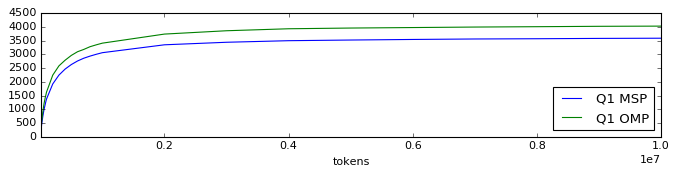

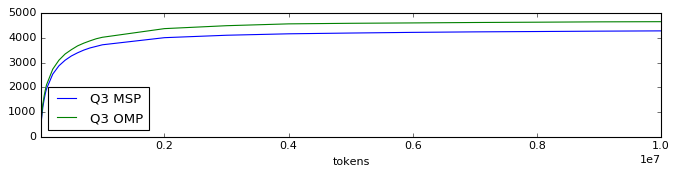

In [95]:
parCOMP[["Q1 MSP","Q1 OMP"]].plot(figsize=(10,2)),parCOMP[["Q3 MSP","Q3 OMP"]].plot(figsize=(10,2))

(<matplotlib.axes._subplots.AxesSubplot at 0x118c135d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118e59590>)

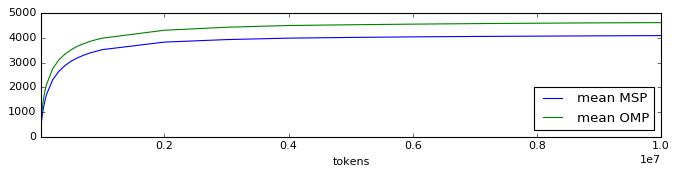

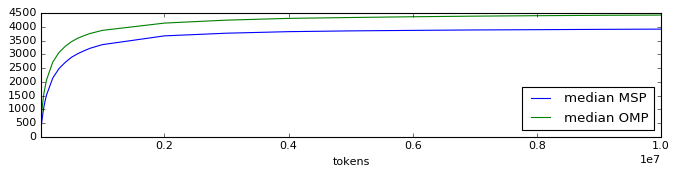

In [96]:
parCOMP[["mean MSP","mean OMP"]].plot(figsize=(10,2)),parCOMP[["median MSP","median OMP"]].plot(figsize=(10,2))

(<matplotlib.axes._subplots.AxesSubplot at 0x118edd490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1176354d0>)

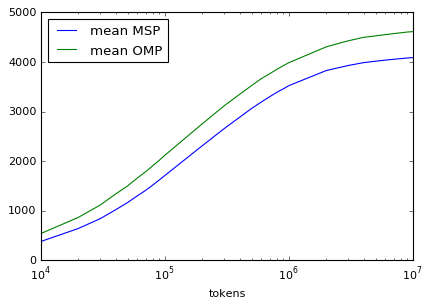

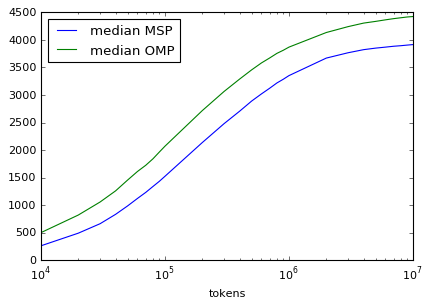

In [97]:
parCOMP[["mean MSP", "mean OMP"]].plot(logx=True),parCOMP[["median MSP", "median OMP"]].plot(logx=True)